### Access a Database with Python using sqlite3 Package - European Soccer Dataset

#### Importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sl
import matplotlib.pylab as plt
# plt.rcParams['figure.figsize'] = 12,8
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Accessing the Database with the sqlite3 Package

In [3]:
con = sl.connect('database.sqlite')
cursor = con.cursor()

#### Getting a list of all the tables saved into the database

In [4]:
for row in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';"):
    print(row)

('sqlite_sequence',)
('Player_Attributes',)
('Player',)
('Match',)
('League',)
('Country',)
('Team',)
('Team_Attributes',)


This is the list of all the available tables in database sqlite_master

#### Reading all the TABLES with pandas library

In [5]:
country_table = pd.read_sql_query("SELECT * FROM Country", con)
league_table = pd.read_sql_query("SELECT * FROM League", con)
match_table = pd.read_sql_query('SELECT * FROM Match', con)
player_table = pd.read_sql_query("SELECT * FROM Player", con)
player_att_table = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
team_table = pd.read_sql_query("SELECT * FROM Team", con)
team_att_table = pd.read_sql_query("SELECT * FROM Team_Attributes", con)

#### Exploratory Data Analysis

In [6]:
player_table.shape

(11060, 7)

In [8]:
player_table.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [9]:
player_table.tail()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172
11059,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176


In [7]:
player_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [10]:
player_table.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,11060.0,5537.511392,3197.692647,1.00,2767.75,5536.50,8306.25,11075.00
player_api_id,11060.0,156582.427215,160713.700624,2625.00,35555.50,96619.50,212470.50,750584.00
player_fifa_api_id,11060.0,165664.910488,58649.928360,2.00,151889.50,184671.00,203883.25,234141.00
height,11060.0,181.867445,6.369201,157.48,177.80,182.88,185.42,208.28
weight,11060.0,168.380289,14.990217,117.00,159.00,168.00,179.00,243.00


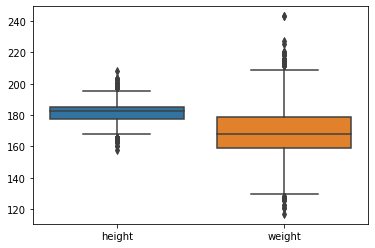

In [14]:
sns.boxplot(data = player_table.loc[:,['height','weight']])
plt.show()